In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [2]:
from google.colab import files
uploaded = files.upload()  # Upload CSV file manually
file_name = list(uploaded.keys())[0]  # Get the uploaded filename

# Specify the encoding when reading the CSV file
df = pd.read_csv(file_name, encoding='latin-1')

print("Dataset Loaded Successfully!\n", df.head())


Saving exp4.csv to exp4.csv
Dataset Loaded Successfully!
    Restaurant_ID             Name   Cuisine  Rating Price_Range  \
0              1  The Spice House    Indian     4.5      Medium   
1              2     Bella Italia   Italian     4.2        High   
2              3    Golden Dragon   Chinese     4.7        High   
3              4   The Burger Hub  American     3.8      Medium   
4              5  Fiesta Mexicana   Mexican     4.1         Low   

   Customer_Count  Revenue  Delivery_Time  Location  
0             200     4500             30     Urban  
1             120     6000             40     Urban  
2             180     7200             25     Urban  
3             250     5000             20  Suburban  
4             300     3500             35  Suburban  


In [3]:
df.head()

,Restaurant_ID,Name,Cuisine,Rating,Price_Range,Customer_Count,Revenue,Delivery_Time,Location
0,1,The Spice House,Indian,4.5,Medium,200,4500,30,Urban
1,2,Bella Italia,Italian,4.2,High,120,6000,40,Urban
2,3,Golden Dragon,Chinese,4.7,High,180,7200,25,Urban
3,4,The Burger Hub,American,3.8,Medium,250,5000,20,Suburban
4,5,Fiesta Mexicana,Mexican,4.1,Low,300,3500,35,Suburban


In [4]:
# Step 2: Data Visualization
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [5]:
# Convert categorical columns to category type
df["Cuisine"] = df["Cuisine"].astype("category")
df["Price_Range"] = df["Price_Range"].astype("category")
df["Location"] = df["Location"].astype("category")

<ipython-input-6-62b6ec40f2c1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["Cuisine"], y=df["Customer_Count"], ci=None)


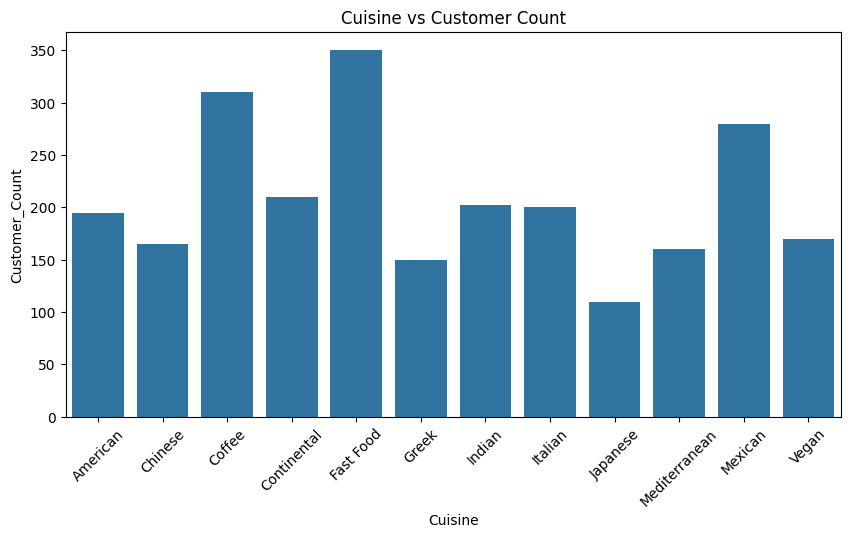

In [6]:
# Bar Chart: Cuisine vs Customer Count
plt.figure(figsize=(10,5))
sns.barplot(x=df["Cuisine"], y=df["Customer_Count"], ci=None)
plt.xticks(rotation=45)
plt.title("Cuisine vs Customer Count")
plt.show()


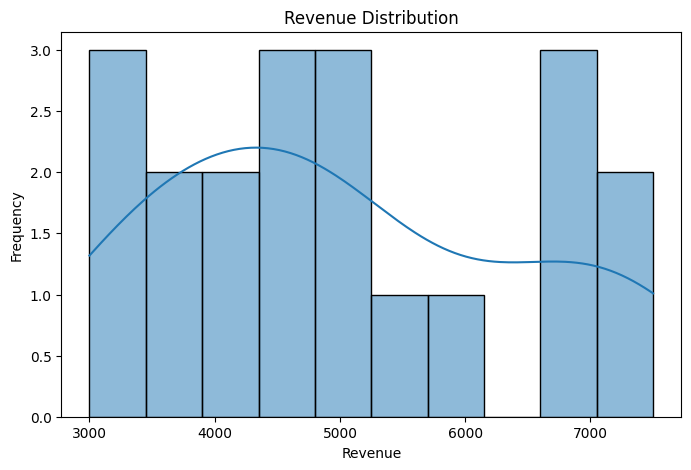

In [7]:
# Histogram: Revenue Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Revenue"], bins=10, kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

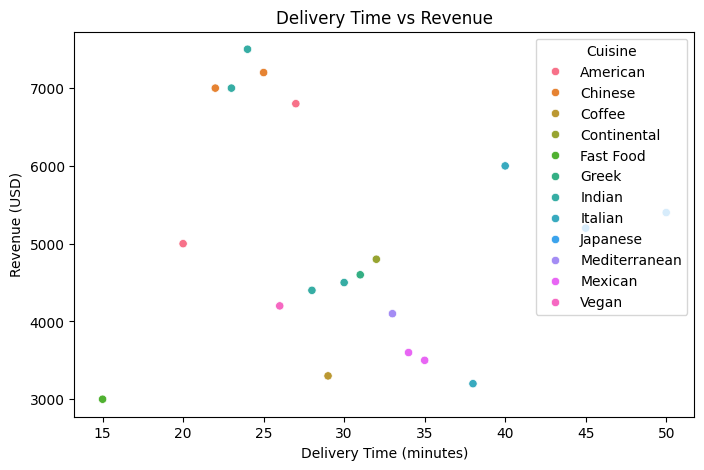

In [8]:
# Scatter Plot: Delivery Time vs Revenue
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Delivery_Time"], y=df["Revenue"], hue=df["Cuisine"])
plt.title("Delivery Time vs Revenue")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Revenue (USD)")
plt.show()

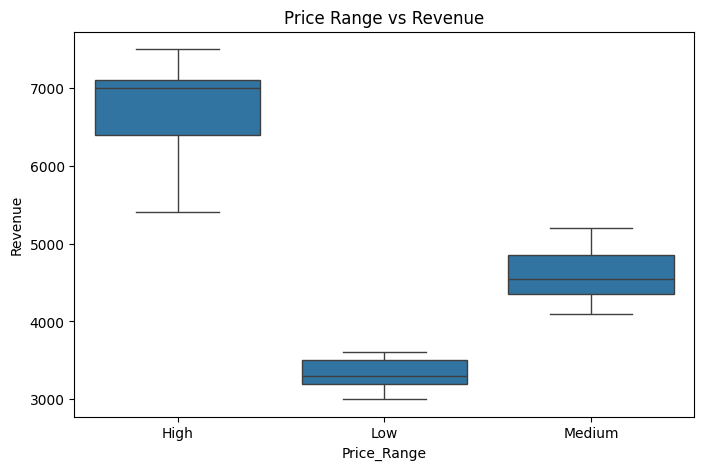

In [9]:
# Box Plot: Price Range vs Revenue
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Price_Range"], y=df["Revenue"])
plt.title("Price Range vs Revenue")
plt.show()

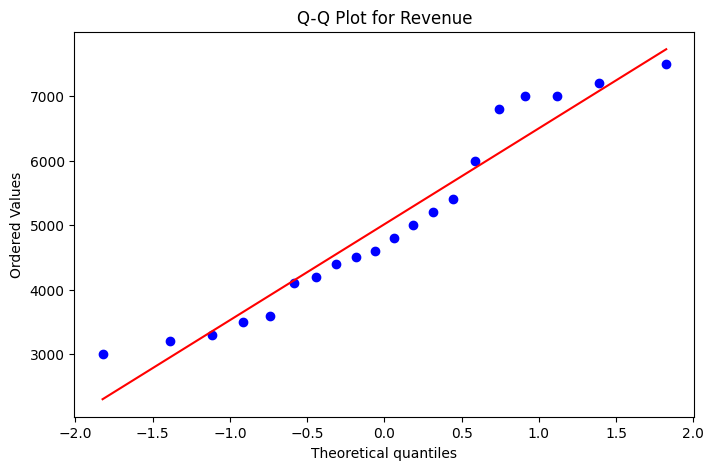

In [10]:
# Q-Q Plot: Check Normality of Revenue
plt.figure(figsize=(8,5))
stats.probplot(df["Revenue"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Revenue")
plt.show()

In [11]:
# Mean, Median, Mode, Standard Deviation
print("Mean Revenue:", df["Revenue"].mean())
print("Median Revenue:", df["Revenue"].median())
print("Mode Revenue:", df["Revenue"].mode()[0])
print("Standard Deviation of Revenue:", df["Revenue"].std())

Mean Revenue: 5015.0
Median Revenue: 4700.0
Mode Revenue: 7000
Standard Deviation of Revenue: 1453.22689937003


In [12]:
# Correlation Analysis
print("\nCorrelation Matrix:\n", df[["Revenue", "Customer_Count", "Delivery_Time"]].corr())


Correlation Matrix:
                  Revenue  Customer_Count  Delivery_Time
Revenue         1.000000       -0.628284      -0.150976
Customer_Count -0.628284        1.000000      -0.432800
Delivery_Time  -0.150976       -0.432800       1.000000


In [13]:
# Chi-Square Test: Cuisine vs Price Range
contingency_table = pd.crosstab(df["Cuisine"], df["Price_Range"])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("\nChi-Square Test Results:")
print("Chi-Square Value:", chi2)
print("P-Value:", p)

if p < 0.05:
    print("Conclusion: Significant relationship exists between Cuisine and Price Range")
else:
    print("Conclusion: No significant relationship between Cuisine and Price Range")


Chi-Square Test Results:
Chi-Square Value: 25.857142857142858
P-Value: 0.2578661266893358
Conclusion: No significant relationship between Cuisine and Price Range


In [14]:
# Pearson Correlation
print("\nPearson Correlation Matrix:\n", df[["Revenue", "Customer_Count", "Delivery_Time"]].corr(method="pearson"))

# Spearman Correlation (for non-linear relationships)
print("\nSpearman Correlation Matrix:\n", df[["Revenue", "Customer_Count", "Delivery_Time"]].corr(method="spearman"))

# Covariance Matrix
print("\nCovariance Matrix:\n", df[["Revenue", "Customer_Count", "Delivery_Time"]].cov())



Pearson Correlation Matrix:
                  Revenue  Customer_Count  Delivery_Time
Revenue         1.000000       -0.628284      -0.150976
Customer_Count -0.628284        1.000000      -0.432800
Delivery_Time  -0.150976       -0.432800       1.000000

Spearman Correlation Matrix:
                  Revenue  Customer_Count  Delivery_Time
Revenue         1.000000       -0.649228      -0.223392
Customer_Count -0.649228        1.000000      -0.291196
Delivery_Time  -0.223392       -0.291196       1.000000

Covariance Matrix:
                      Revenue  Customer_Count  Delivery_Time
Revenue         2.111868e+06   -63678.947368   -1863.421053
Customer_Count -6.367895e+04     4864.210526    -256.368421
Delivery_Time  -1.863421e+03     -256.368421      72.134211


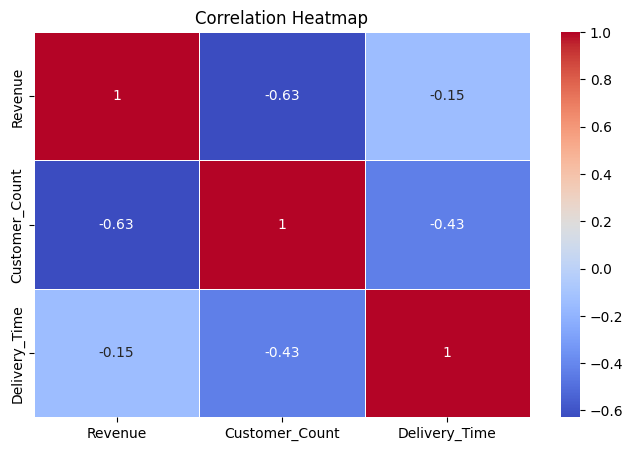

In [15]:
import seaborn as sns
# Heatmap for Correlation
plt.figure(figsize=(8,5))
sns.heatmap(df[["Revenue", "Customer_Count", "Delivery_Time"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

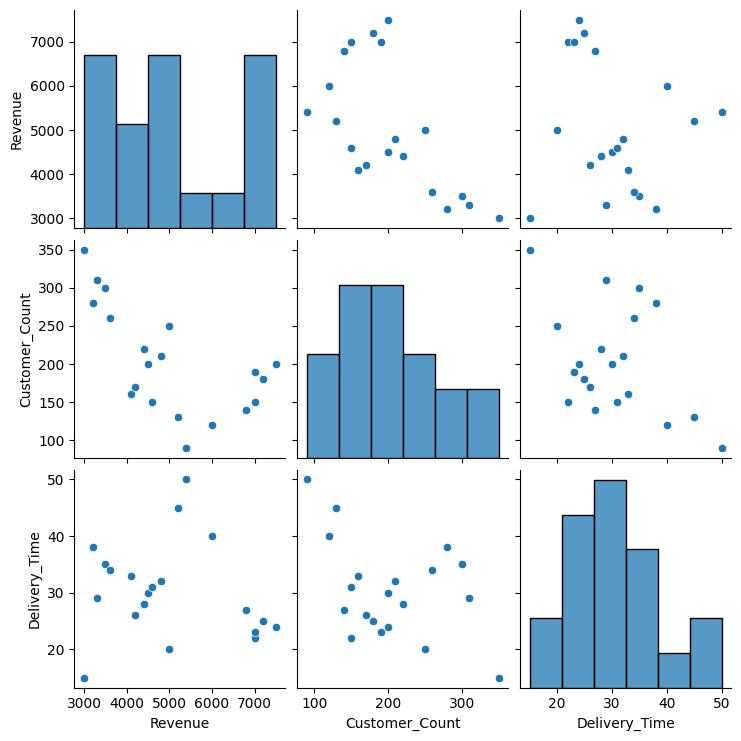

In [16]:
# Pair Plot (to visualize relationships between numeric variables)
sns.pairplot(df[["Revenue", "Customer_Count", "Delivery_Time"]])
plt.show()

In [17]:
# Chi-Square Test: Cuisine vs Price Range
contingency_table = pd.crosstab(df["Cuisine"], df["Price_Range"])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("\nChi-Square Test Results:")
print("Chi-Square Value:", chi2)
print("P-Value:", p)
if p < 0.05:
    print("Conclusion: Significant relationship exists between Cuisine and Price Range")
else:
    print("Conclusion: No significant relationship between Cuisine and Price Range")


Chi-Square Test Results:
Chi-Square Value: 25.857142857142858
P-Value: 0.2578661266893358
Conclusion: No significant relationship between Cuisine and Price Range


In [18]:
# ANOVA Test: Revenue across different Cuisines
anova_p_value = stats.f_oneway(*[df[df["Cuisine"] == cuisine]["Revenue"] for cuisine in df["Cuisine"].unique()])
print("\nANOVA Test P-Value:", anova_p_value.pvalue)
if anova_p_value.pvalue < 0.05:
    print("Conclusion: Significant difference in Revenue across Cuisines")
else:
    print("Conclusion: No significant difference in Revenue across Cuisines")


ANOVA Test P-Value: 0.31406286527765837
Conclusion: No significant difference in Revenue across Cuisines
